In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import glob
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
base_dir = "/content/drive/MyDrive/YANG/unzip"
img_folders = glob.glob(base_dir+"/img*")
label_folders = glob.glob(base_dir+"/label*")

In [4]:
for train_val in label_folders:
    food_folders = glob.glob(train_val +"/xml/*")
    for food in tqdm(food_folders):
        foodname = food.split("/")[-1]
        labeldf = pd.read_csv(food+f"/{foodname}.csv")

        for i in labeldf.index:
            image_path = labeldf["filepath"][i]
            filename = labeldf["filename"][i]
            img_read = Image.open(image_path)
            img_arr = np.array(img_read)

            cy_min = labeldf["c_ymin"][i]
            cy_max = labeldf["c_ymax"][i]
            cx_min = labeldf["c_xmin"][i]
            cx_max = labeldf["c_xmax"][i]

            dy_min = labeldf["d_ymin"][i]
            dy_max = labeldf["d_ymax"][i]
            dx_min = labeldf["d_xmin"][i]
            dx_max = labeldf["d_xmax"][i]

            ymin = min(cy_min,dy_min)
            ymax = max(cy_max,dy_max)
            xmin = min(cx_min,dx_min)
            xmax = max(cx_max,dx_max)

            cropped_image = img_arr[ymin:ymax, xmin:xmax]

#             plt.imshow(cropped_image)
#             plt.show()

            cy_min -= ymin
            cy_max -= ymin
            cx_min -= xmin
            cx_max -= xmin

            dy_min -= ymin
            dy_max -= ymin
            dx_min -= xmin
            dx_max -= xmin

            # 이미지의 높이와 너비 가져오기
            height, width = cropped_image.shape[:2]

            # 제외할 특정 지점을 제외한 나머지 픽셀을 0으로 설정
            for y in range(height):
                for x in range(width):
                    if not(cy_min <= y <= cy_max and cx_min <= x <= cx_max):
                        if not(dy_min <= y <= dy_max and dx_min <= x <= dx_max):
                            cropped_image[y, x] = [0, 0, 0]  # BGR 채널 모두 0으로 설정

            # 결과 이미지 출력
#             plt.imshow(cropped_image)
#             plt.show()

            split_path = image_path.split("/")
            split_path[2] = "images"
            split_path[-4] = "crop_black"
            save_path = "/".join(split_path[:-1])
            label_path = "/".join(split_path[:-2])

            os.makedirs(save_path, exist_ok=True)

            cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

            path = save_path + f"/crop_{filename}"
            ptype = os.path.splitext(path)[1]
            ret, img_arr = cv2.imencode(ptype, cropped_image_rgb)

            if ret:
                with open(path, mode='w+b') as f:
                    img_arr.tofile(f)

            labeldf.loc[i, "filepath"] = path
            labeldf.loc[i, "filename"] = f"crop_{filename}"
            labeldf.loc[i, "size_w"] = width
            labeldf.loc[i, "size_h"] = height
        new_label = labeldf.iloc[:,:5]
        new_label.to_csv(label_path+f"/{foodname}.csv", index=False)


  0%|          | 0/83 [00:01<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/img_train/image/YANG/unzip/label_train/xml/갈비탕/Q1/side_건더기국류_뚝배기_갈비탕_Q1_00001.JPG'

### 동전, 그릇, 음식으로 크롭하기



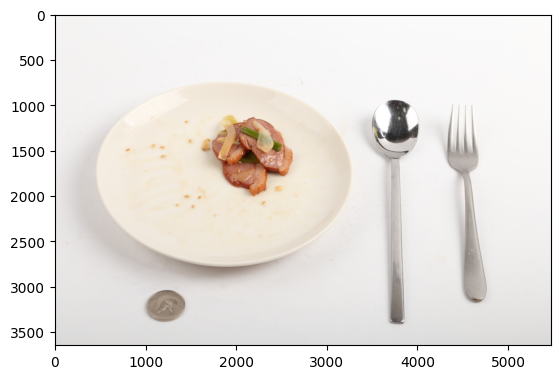

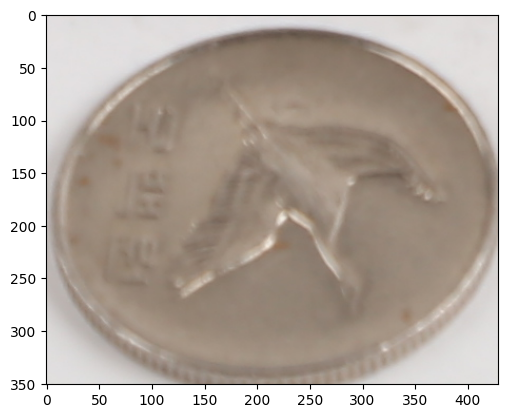

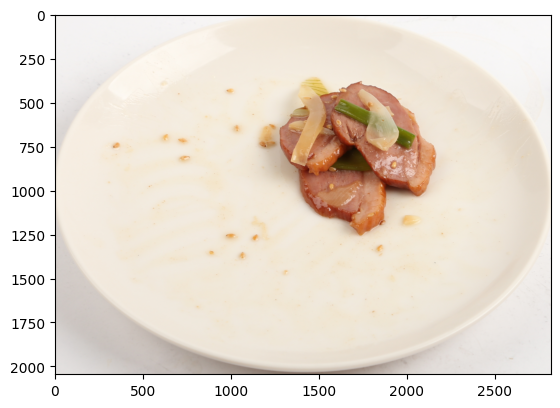

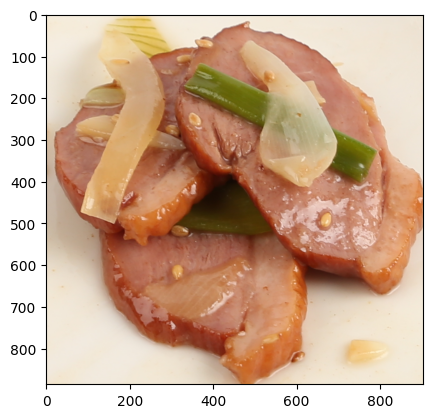

In [ ]:
# 원본 이미지 불러오기
image_path = labeldf["filepath"][0]
img_read = Image.open(image_path)
img_arr = np.array(img_read)

plt.imshow(img_arr)
plt.show()

y_min = labeldf["c_ymin"][0]
y_max = labeldf["c_ymax"][0]
x_min = labeldf["c_xmin"][0]
x_max = labeldf["c_xmax"][0]
# 이미지에서 crop할 부분 추출
cropped_image = img_arr[y_min:y_max, x_min:x_max]

plt.imshow(cropped_image)
plt.show()

y_min = labeldf["d_ymin"][0]
y_max = labeldf["d_ymax"][0]
x_min = labeldf["d_xmin"][0]
x_max = labeldf["d_xmax"][0]
# 이미지에서 crop할 부분 추출
cropped_image = img_arr[y_min:y_max, x_min:x_max]

plt.imshow(cropped_image)
plt.show()

y_min = labeldf["f_ymin"][0]
y_max = labeldf["f_ymax"][0]
x_min = labeldf["f_xmin"][0]
x_max = labeldf["f_xmax"][0]
# 이미지에서 crop할 부분 추출
cropped_image = img_arr[y_min:y_max, x_min:x_max]

plt.imshow(cropped_image)
plt.show()

In [ ]:
p = labeldf["filepath"][0]
pp = p.split("/")
pp[-4] = "crop_black"
ppp = "/".join(pp[:-1])
ppp

'G:/tmp_project/img_val/crop_black/훈제오리/Q1'

### crop하고 먹칠하기

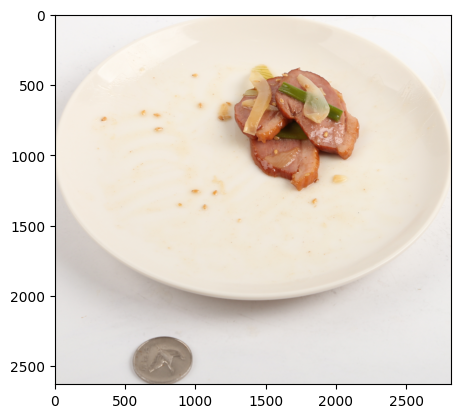

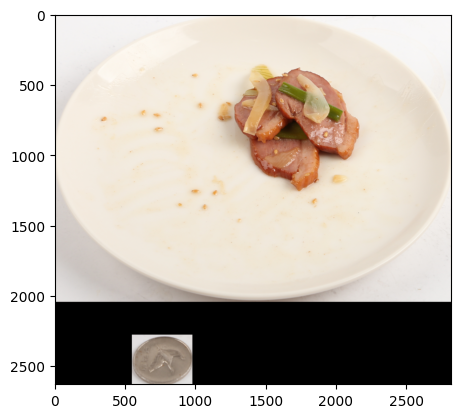

In [ ]:
image_path = labeldf["filepath"][0]
filename = labeldf["filename"][0]
img_read = Image.open(image_path)
img_arr = np.array(img_read)

labeldf

cy_min = labeldf["c_ymin"][0]
cy_max = labeldf["c_ymax"][0]
cx_min = labeldf["c_xmin"][0]
cx_max = labeldf["c_xmax"][0]

dy_min = labeldf["d_ymin"][0]
dy_max = labeldf["d_ymax"][0]
dx_min = labeldf["d_xmin"][0]
dx_max = labeldf["d_xmax"][0]

ymin = min(cy_min,dy_min)
ymax = max(cy_max,dy_max)
xmin = min(cx_min,dx_min)
xmax = max(cx_max,dx_max)

cropped_image = img_arr[ymin:ymax, xmin:xmax]

plt.imshow(cropped_image)
plt.show()

cy_min -= ymin
cy_max -= ymin
cx_min -= xmin
cx_max -= xmin

dy_min -= ymin
dy_max -= ymin
dx_min -= xmin
dx_max -= xmin

# 이미지의 높이와 너비 가져오기
height, width = cropped_image.shape[:2]

# 제외할 특정 지점을 제외한 나머지 픽셀을 0으로 설정
for y in range(height):
    for x in range(width):
        if not(cy_min <= y <= cy_max and cx_min <= x <= cx_max):
            if not(dy_min <= y <= dy_max and dx_min <= x <= dx_max):
                cropped_image[y, x] = [0, 0, 0]  # BGR 채널 모두 0으로 설정

# 결과 이미지 출력
plt.imshow(cropped_image)
plt.show()

split_path = image_path.split("/")
split_path[-4] = "crop_black"
save_path = "/".join(split_path[:-1])
label_path = "/".join(split_path[:-2])

os.makedirs(save_path, exist_ok=True)

cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

path = save_path + f"/crop_{filename}"
ptype = os.path.splitext(path)[1]
ret, img_arr = cv2.imencode(ptype, cropped_image_rgb)

if ret:
    with open(path, mode='w+b') as f:
        img_arr.tofile(f)


### crop없이 먹칠만

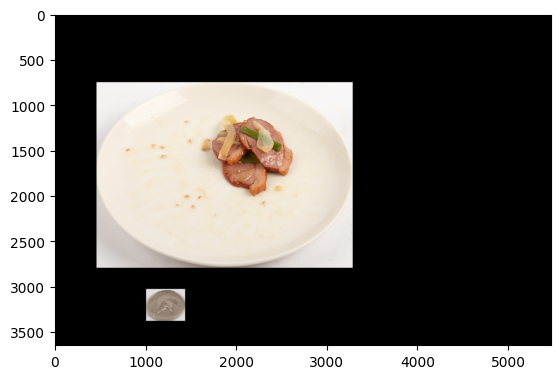

In [ ]:
image_path = labeldf["filepath"][0]
img_read = Image.open(image_path)
img_arr = np.array(img_read)

cy_min = labeldf["c_ymin"][0]
cy_max = labeldf["c_ymax"][0]
cx_min = labeldf["c_xmin"][0]
cx_max = labeldf["c_xmax"][0]
# 이미지에서 crop할 부분 추출

dy_min = labeldf["d_ymin"][0]
dy_max = labeldf["d_ymax"][0]
dx_min = labeldf["d_xmin"][0]
dx_max = labeldf["d_xmax"][0]


exclude_areas = [
    [(cx_min, cy_min),(cx_max,cy_max)],  # 첫 번째 공간 (왼쪽 상단 모서리와 오른쪽 하단 모서리 좌표)
    [(dx_min, dy_min),(dx_max,dy_max)]   # 두 번째 공간 (왼쪽 상단 모서리와 오른쪽 하단 모서리 좌표)
]

# 이미지의 높이와 너비 가져오기
height, width = img_arr.shape[:2]

# 제외할 특정 공간들을 제외한 나머지 픽셀을 0으로 설정
for y in range(height):
    for x in range(width):
        # 각 제외할 공간을 확인
        in_exclude_area = False
        for area in exclude_areas:
            if area[0][0] <= x <= area[1][0] and area[0][1] <= y <= area[1][1]:
                in_exclude_area = True
                break
        if not in_exclude_area:
            img_arr[y, x] = [0, 0, 0]  # BGR 채널 모두 0으로 설정

# 결과 이미지 출력
plt.imshow(img_arr)
plt.show()

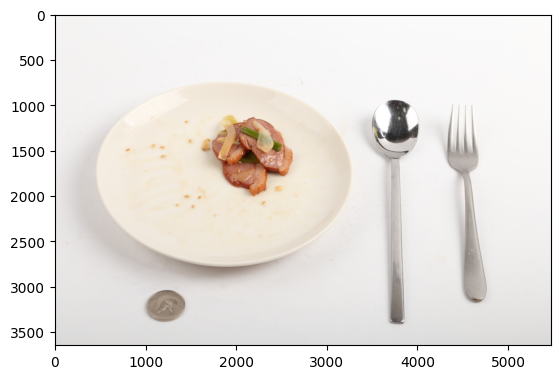

In [ ]:
# crop된 이미지 저장
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

path = save_path + f"/crop_{filename}"
ptype = os.path.splitext(path)[1]
ret, img_arr = cv2.imencode(ptype, cropped_image_rgb)

if ret:
    with open(path, mode='w+b') as f:
        img_arr.tofile(f)